In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ECDF Function

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

How Often do we get no_hitters

In [2]:
nohitter_times=np.array([2491,745,1521,511,2819,765,280,2915,1687,378,1044,1582,31,1555,1172,1134,225,388,55,1693,792,
                         1848,192,192,157,179,577,242,660,206,563,0,215,110,595,2351,3931,238,79,4043,2055,100,31,1025,
                         3260,899,45,1568,2983,1351,675,252,1403,180,445,576,149,203,986,385,1001,603,778,354,1397,82,
                         156,702,179,240,323,1491,539,605,226,715,731,192,232,811,380,64,1124,12,136,197,8,509,774,110,
                         327,171,650,463,1243,675,54,216,2199,176,386,1086,269,52,600,267,288,44,498,1531,219,224,717,
                         1497,480,996,943,37,583,462,1194,1023,1529,397,528,255,233,603,73,392,542,2267,557,697,479,151,
                         1575,41,211,2147,127,2752,2181,77,1525,548,26,1322,1765,1070,4021,750,2432,2900,1084,1665,886,
                         11,2090,42,2088,645,887,813,1114,308,2,12,39,59,299,26,524,23,702,96,166,983,188,93,251,123,
                         1104,1878,62,429,1309,104,1468,124,1325,91,20,107,450,29,624,966,715,545,219,161,324,278,814,
                         684,215,1101,1613,843])

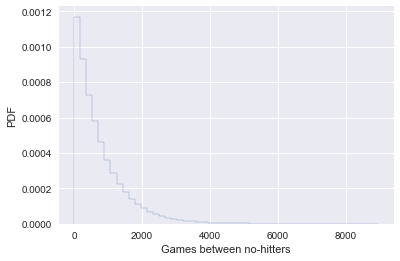

In [3]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()





Do the data follow our story ?


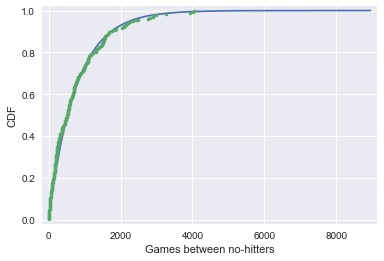

In [8]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


How is this parameter Optimal?

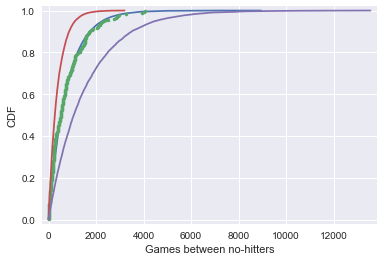

In [9]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

EDA of literacy/fertility data



In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

In [11]:
#Pearson Correlation Coefficient

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


In [15]:
fertility=np.array([1.769,2.682,2.077,2.132,1.827,3.872,2.288,5.173,1.393,1.262,2.156,3.026,2.033,1.324,2.816,5.211,
                    2.1,1.781,1.822,5.908,1.881,1.852,1.39,2.281,2.505,1.224,1.361,1.468,2.404,5.52,4.058,2.223,4.859,
                    1.267,2.342,1.579,6.254,2.334,3.961,6.505,2.53,2.823,2.498,2.248,2.508,3.04,1.854,4.22,5.1,4.967,
                    1.325,4.514,3.173,2.308,4.62,4.541,5.637,1.926,1.747,2.294,5.841,5.455,7.069,2.859,4.018,2.513,
                    5.405,5.737,3.363,4.89,1.385,1.505,6.081,1.784,1.378,1.45,1.841,1.37,2.612,5.329,5.33,3.371,1.281,
                    1.871,2.153,5.378,4.45,1.46,1.436,1.612,3.19,2.752,3.35,4.01,4.166,2.642,2.977,3.415,2.295,3.019,
                    2.683,5.165,1.849,1.836,2.518,2.43,4.528,1.263,1.885,1.943,1.899,1.442,1.953,4.697,1.582,2.025,
                    1.841,5.011,1.212,1.502,2.516,1.367,2.089,4.388,1.854,1.748,2.978,2.152,2.362,1.988,1.426,3.29,
                    3.264,1.436,1.393,2.822,4.969,5.659,3.24,1.693,1.647,2.36,1.792,3.45,1.516,2.233,2.563,5.283,3.885,
                    0.966,2.373,2.663,1.251,2.052,3.371,2.093,2,3.883,3.852,3.718,1.732,3.928])

In [16]:
illiteracy=np.array([9.5,49.2,1,11.2,9.8,60,50.2,51.2,0.6,1,8.5,6.1,9.8,1,42.2,77.2,18.7,22.8,8.5,43.9,1,1,1.5,10.8,
                     11.9,3.4,0.4,3.1,6.6,33.7,40.4,2.3,17.2,0.7,36.1,1,33.2,55.9,30.8,87.4,15.4,54.6,5.1,1.1,10.2,
                     19.8,0,40.7,57.2,59.9,3.1,55.7,22.8,10.9,34.7,32.2,43,1.3,1,0.5,78.4,34.2,84.9,29.1,31.3,18.3,
                     81.8,39,11.2,67,4.1,0.2,78.1,1,7.1,1,29,1.1,11.7,73.6,33.9,14,0.3,1,0.8,71.9,40.1,1,2.1,3.8,16.5,
                     4.1,0.5,44.4,46.3,18.7,6.5,36.8,18.6,11.1,22.1,71.1,1,0,0.9,0.7,45.5,8.4,0,3.8,8.5,2,1,58.9,0.3,1,
                     14,47,4.1,2.2,7.2,0.3,1.5,50.5,1.3,0.6,19.1,6.9,9.2,2.2,0.2,12.3,4.9,4.6,0.3,16.5,65.7,63.5,16.8,
                     0.2,1.8,9.6,15.2,14.4,3.3,10.6,61.3,10.9,32.2,9.3,11.6,20.7,6.5,6.7,3.5,1,1.6,20.5,1.5,16.7,2,0.9])

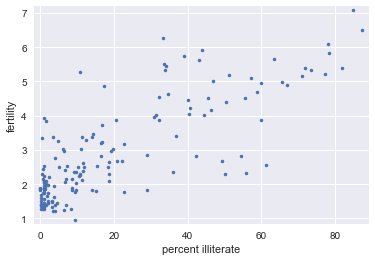

0.8041324026815347


In [17]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.',linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))



slope = 0.04979854809063426 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


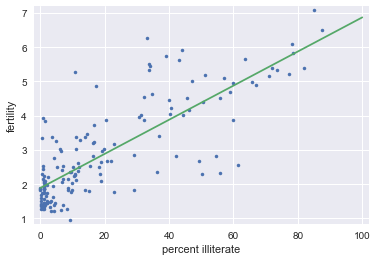

In [18]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()
